In [1]:
import pandas as pd
import glob
import os


# Caminho para os arquivos CSV
caminho_pasta = r'D:\Downloads\AESA'  # o 'r' antes da string evita erros com "\"

# Pegar todos os arquivos .csv da pasta
arquivos_csv = glob.glob(os.path.join(caminho_pasta, "*.csv"))

# Lista para armazenar os DataFrames
dfs = []

# Loop para ler cada arquivo e adicionar uma coluna com o nome do arquivo
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo, sep=';', encoding='utf-8', engine='python')
    df['origem'] = os.path.basename(arquivo)  # nome do arquivo como coluna
    dfs.append(df)

# Concatenar tudo
df_total = pd.concat(dfs, ignore_index=True)

# Exibir as primeiras linhas
df_total.head()


,Município,Pluviometria observada (mm),Data,origem
0,Água Branca,"383,7",01/1994,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
1,Aguiar,"607,3",01/1994,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
2,Alagoa Grande,"138,5",01/1994,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
3,Alagoa Nova,"82,5",01/1994,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
4,Alagoinha,"156,7",01/1994,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv


In [2]:
# Corrigir o nome da coluna, se tiver espaços ou caracteres ocultos
df_total.columns = df_total.columns.str.strip()

df_total['Data'] = pd.to_datetime(df_total['Data'], format='%m/%Y')


In [3]:
df_total.head()

,Município,Pluviometria observada (mm),Data,origem
0,Água Branca,"383,7",1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
1,Aguiar,"607,3",1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
2,Alagoa Grande,"138,5",1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
3,Alagoa Nova,"82,5",1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
4,Alagoinha,"156,7",1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv


In [4]:
df_total['Pluviometria observada (mm)'] = (
    df_total['Pluviometria observada (mm)']
    .astype(str)                              # garante que todos os valores são strings
    .str.replace('.', '', regex=False)        # remove os pontos de milhar
    .str.replace(',', '.', regex=False)       # troca vírgula decimal por ponto
    .astype(float)                            # converte para número
)


In [5]:
df_total.head()

,Município,Pluviometria observada (mm),Data,origem
0,Água Branca,383.7,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
1,Aguiar,607.3,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
2,Alagoa Grande,138.5,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
3,Alagoa Nova,82.5,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
4,Alagoinha,156.7,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv


In [6]:
# Criar coluna de ano/mês
df_total['AnoMes'] = df_total['Data'].dt.to_period('M')

# Calcular média mensal de todos os municípios
df_media_mensal_estado = df_total.groupby('AnoMes')['Pluviometria observada (mm)'].mean().reset_index()

# Converter AnoMes para datetime novamente (opcional, para gráficos)
df_media_mensal_estado['Data'] = df_media_mensal_estado['AnoMes'].dt.to_timestamp()

# Exibir
print(df_media_mensal_estado.head())


    AnoMes  Pluviometria observada (mm)       Data
0  1994-01                   236.633588 1994-01-01
1  1994-02                   110.181538 1994-02-01
2  1994-03                   162.813178 1994-03-01
3  1994-04                   120.398450 1994-04-01
4  1994-05                   122.974419 1994-05-01


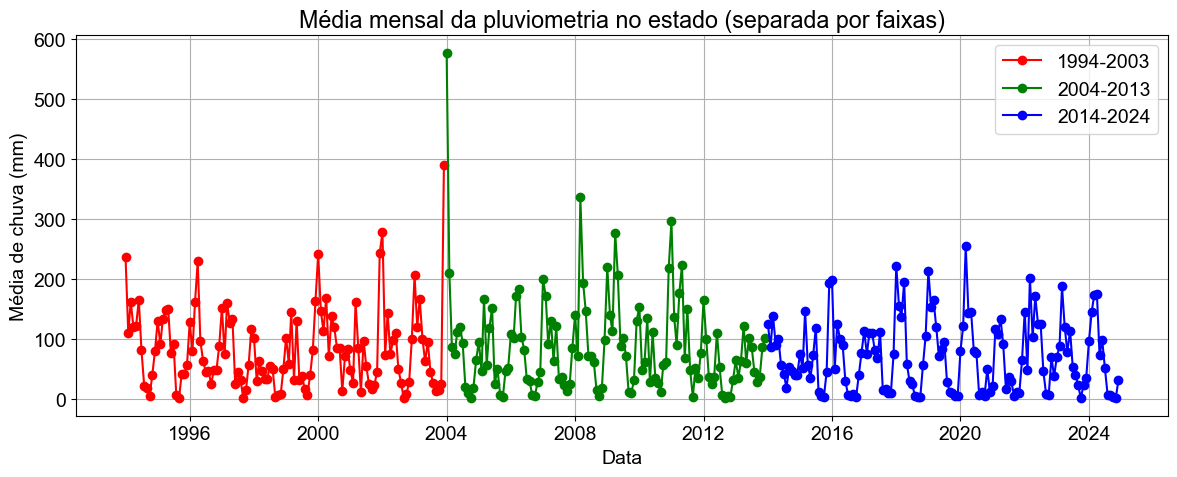

In [7]:
import matplotlib.pyplot as plt

# Intervalos de anos
faixas = {
    '1994-2003': (1994, 2003),
    '2004-2013': (2004, 2013),
    '2014-2024': (2014, 2024),
}

# Cores para cada faixa
cores = {
    '1994-2003': 'red',
    '2004-2013': 'green',
    '2014-2024': 'blue',
}
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

plt.figure(figsize=(12, 5))

for faixa, (ano_ini, ano_fim) in faixas.items():
    # Filtrar a faixa de anos
    subset = df_media_mensal_estado[
        (df_media_mensal_estado['Data'].dt.year >= ano_ini) &
        (df_media_mensal_estado['Data'].dt.year <= ano_fim)
    ].copy()
    
    # Ordenar por data
    subset = subset.sort_values('Data')
    
    # Plotar a linha da faixa
    plt.plot(
        subset['Data'],
        subset['Pluviometria observada (mm)'],
        marker='o',
        color=cores[faixa],
        label=faixa
    )

plt.title("Média mensal da pluviometria no estado (separada por faixas)")
plt.xlabel("Data")
plt.ylabel("Média de chuva (mm)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("plots/media_mensal_paraiba.png", dpi=300)
plt.show()


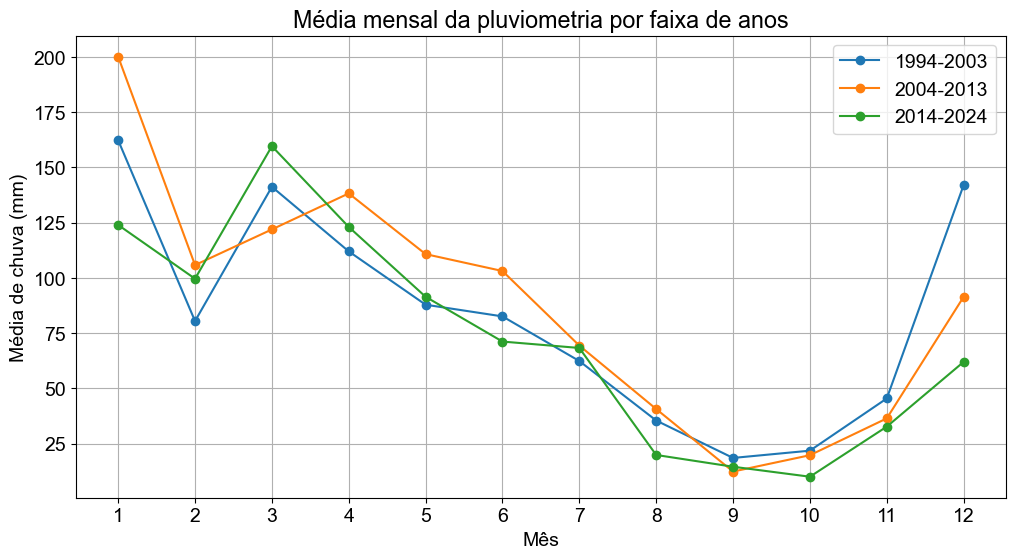

In [36]:
import matplotlib.pyplot as plt

# Faixas de anos que quer comparar
faixas = {
    '1994-2003': (1994, 2003),
    '2004-2013': (2004, 2013),
    '2014-2024': (2014, 2024),
}

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

plt.figure(figsize=(12,6))

for label, (ano_inicio, ano_fim) in faixas.items():
    df_faixa = df_total[(df_total['Data'].dt.year >= ano_inicio) & (df_total['Data'].dt.year <= ano_fim)]
    media_mensal = df_faixa.groupby(df_faixa['Data'].dt.month)['Pluviometria observada (mm)'].mean()
    plt.plot(media_mensal.index, media_mensal.values, marker='o', label=label)

plt.title('Média mensal da pluviometria por faixa de anos')
plt.xlabel('Mês')
plt.ylabel('Média de chuva (mm)')
plt.xticks(range(1,13))
plt.grid(True)
plt.legend()

# Ajustar borda ao redor da figura
plt.savefig("plots/media_mensal_paraiba_agg_meses.png", dpi=300, bbox_inches='tight')
plt.show()


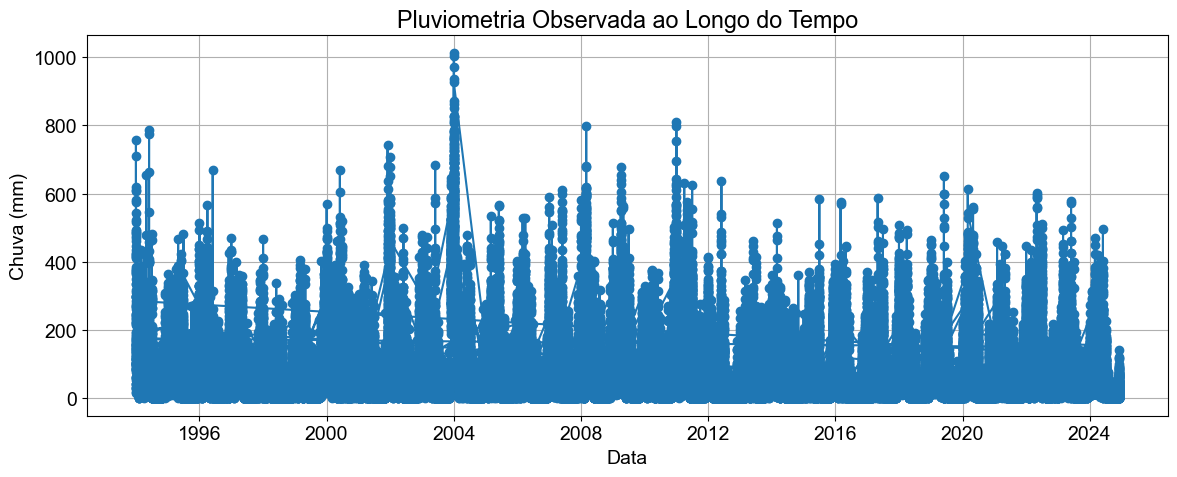

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_total['Data'], df_total['Pluviometria observada (mm)'], marker='o', linestyle='-')
plt.title("Pluviometria Observada ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Chuva (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


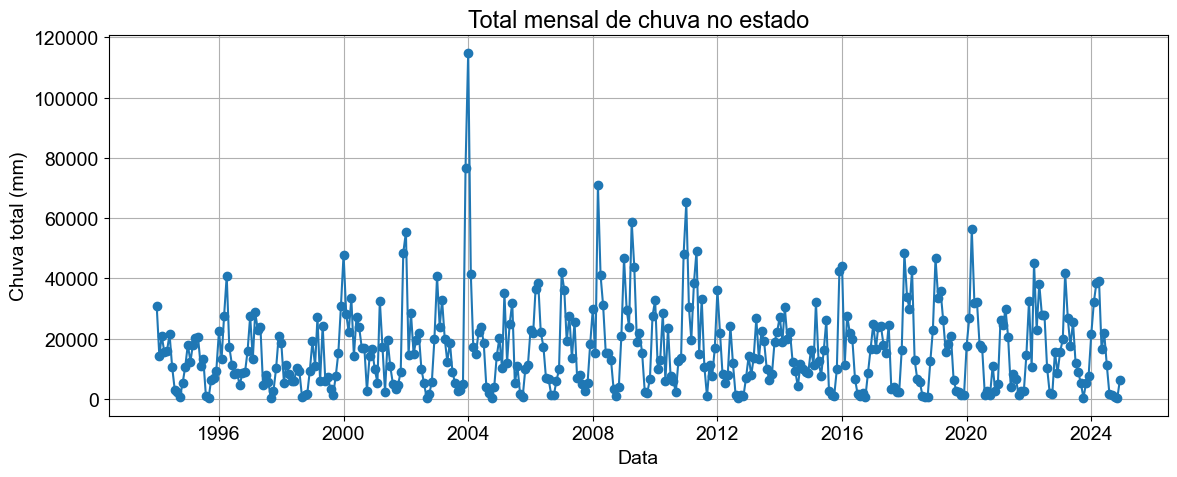

In [10]:
df_mensal_estado = df_total.groupby(df_total['Data'].dt.to_period('M'))['Pluviometria observada (mm)'].sum().reset_index()
df_mensal_estado['Data'] = df_mensal_estado['Data'].dt.to_timestamp()



plt.figure(figsize=(12,5))
plt.plot(df_mensal_estado['Data'], df_mensal_estado['Pluviometria observada (mm)'], marker='o', linestyle='-')
plt.title("Total mensal de chuva no estado")
plt.xlabel("Data")
plt.ylabel("Chuva total (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


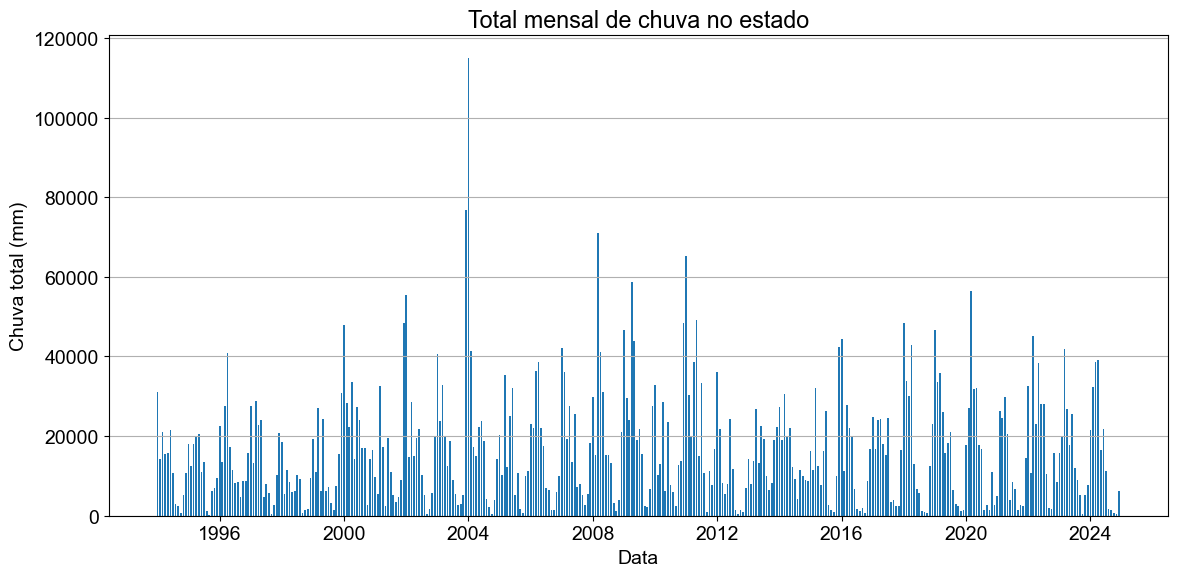

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(df_mensal_estado['Data'], df_mensal_estado['Pluviometria observada (mm)'], width=20)  # width ajusta a largura das barras
plt.title("Total mensal de chuva no estado")
plt.xlabel("Data")
plt.ylabel("Chuva total (mm)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [12]:
df_total.head(500)

,Município,Pluviometria observada (mm),Data,origem,AnoMes
0,Água Branca,383.7,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv,1994-01
1,Aguiar,607.3,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv,1994-01
2,Alagoa Grande,138.5,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv,1994-01
3,Alagoa Nova,82.5,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv,1994-01
4,Alagoinha,156.7,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv,1994-01
...,...,...,...,...,...
495,Duas Estradas,101.7,1997-01-01,Pluviometria (mm) - 01_01_1997 a 31_01_1997.csv,1997-01
496,Emas,160.2,1997-01-01,Pluviometria (mm) - 01_01_1997 a 31_01_1997.csv,1997-01
497,Esperança,96.1,1997-01-01,Pluviometria (mm) - 01_01_1997 a 31_01_1997.csv,1997-01
498,Fagundes,89.7,1997-01-01,Pluviometria (mm) - 01_01_1997 a 31_01_1997.csv,1997-01


In [13]:
df_mensal_estado.head(10)

,Data,Pluviometria observada (mm)
0,1994-01-01,30999.0
1,1994-02-01,14323.6
2,1994-03-01,21002.9
3,1994-04-01,15531.4
4,1994-05-01,15863.7
5,1994-06-01,21505.4
6,1994-07-01,10763.0
7,1994-08-01,3008.2
8,1994-09-01,2417.6
9,1994-10-01,697.1


In [14]:
df_media_mensal_estado.head(30)

,AnoMes,Pluviometria observada (mm),Data
0,1994-01,236.633588,1994-01-01
1,1994-02,110.181538,1994-02-01
2,1994-03,162.813178,1994-03-01
3,1994-04,120.398450,1994-04-01
4,1994-05,122.974419,1994-05-01
5,1994-06,165.426154,1994-06-01
6,1994-07,82.160305,1994-07-01
7,1994-08,22.963359,1994-08-01
8,1994-09,18.454962,1994-09-01
9,1994-10,5.321374,1994-10-01


In [15]:
df_media_mensal_estado.to_csv("media mensal chuva paraíba.csv",index=True, encoding='utf-8')

In [16]:
df_total.to_csv("Pluviometria 1994-2024.csv", index=False, encoding='utf-8')


In [17]:
# !pip install pymannkendall

In [18]:
import pymannkendall as mk

# Série de precipitação (mensal ou anual, dependendo do que você escolheu)
serie = df_media_mensal_estado["Pluviometria observada (mm)"]

# Teste Mann-Kendall original
res_original = mk.original_test(serie)

# Teste com correção de Hamed & Rao (pré-branqueamento para autocorrelação)
res_hamed = mk.hamed_rao_modification_test(serie)

# Teste com correção de Yue & Wang (mais robusto à autocorrelação)
res_yue = mk.yue_wang_modification_test(serie)

# Exibir os resultados
print("===== Mann-Kendall Original =====")
print(res_original)
print("\n===== Hamed & Rao Modification =====")
print(res_hamed)
print("\n===== Yue & Wang Modification =====")
print(res_yue)


===== Mann-Kendall Original =====
Mann_Kendall_Test(trend='no trend', h=False, p=0.11461853980264447, z=-1.577769644936682, Tau=-0.05480682839173405, s=-3782.0, var_s=5742832.666666667, slope=-0.04040567117522108, intercept=74.19823975725839)

===== Hamed & Rao Modification =====
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.09968501581736255, z=-1.6463825870161566, Tau=-0.05480682839173405, s=-3782.0, var_s=5274142.097195617, slope=-0.04040567117522108, intercept=74.19823975725839)

===== Yue & Wang Modification =====
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='decreasing', h=True, p=0.00015119933096086058, z=-3.7890913177173116, Tau=-0.05480682839173405, s=-3782.0, var_s=995733.7114145355, slope=-0.04040567117522108, intercept=74.19823975725839)


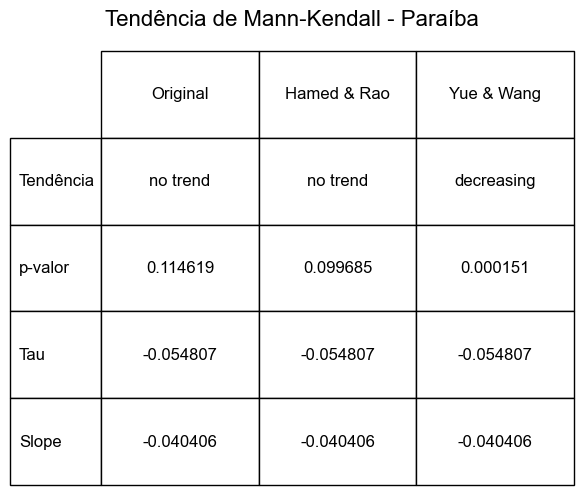

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import pymannkendall as mk

# Série de precipitação
serie = df_media_mensal_estado["Pluviometria observada (mm)"]

# Aplicar os testes Mann-Kendall
res_original = mk.original_test(serie)
res_hamed = mk.hamed_rao_modification_test(serie)
res_yue = mk.yue_wang_modification_test(serie)

# Criar DataFrame com os resultados
df_resultado = pd.DataFrame({
    "Original": [res_original.trend, res_original.p, res_original.Tau, res_original.slope],
    "Hamed & Rao": [res_hamed.trend, res_hamed.p, res_hamed.Tau, res_hamed.slope],
    "Yue & Wang": [res_yue.trend, res_yue.p, res_yue.Tau, res_yue.slope]
}, index=["Tendência", "p-valor", "Tau", "Slope"])


plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

# Formatar valores numéricos para 6 casas decimais
for idx in ["p-valor", "Tau", "Slope"]:
    df_resultado.loc[idx] = df_resultado.loc[idx].map(lambda x: f"{x:.6f}")

# Criar figura ajustando tamanho para caber toda a tabela
fig, ax = plt.subplots(figsize=(len(df_resultado.columns)*2, len(df_resultado)*0.8 + 1.5))

# Remover eixos
ax.axis('off')
ax.axis('tight')

# Criar tabela ocupando toda a figura
tabela = ax.table(
    cellText=df_resultado.values,
    rowLabels=df_resultado.index,
    colLabels=df_resultado.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]  # expande a tabela para toda a figura
)

# Ajustar layout para não cortar nada
plt.tight_layout()

# Ajustar a posição do título para cima
fig.suptitle("Tendência de Mann-Kendall - Paraíba", fontsize=16, y=1.05)

# Salvar gráfico
plt.savefig("plots/tendencia_paraiba.png", dpi=300, bbox_inches='tight')
plt.show()

df_resultado.to_html("Tendencia-Paraiba.html", index=True)


In [20]:
print(serie.head(20))

0     236.633588
1     110.181538
2     162.813178
3     120.398450
4     122.974419
5     165.426154
6      82.160305
7      22.963359
8      18.454962
9       5.321374
10     40.272519
11     79.772180
12    130.305072
13     92.262222
14    133.560741
15    149.071111
16    150.764706
17     76.562238
18     92.782069
19      7.345517
Name: Pluviometria observada (mm), dtype: float64


In [21]:
print(df_media_mensal_estado.head(20))

     AnoMes  Pluviometria observada (mm)       Data
0   1994-01                   236.633588 1994-01-01
1   1994-02                   110.181538 1994-02-01
2   1994-03                   162.813178 1994-03-01
3   1994-04                   120.398450 1994-04-01
4   1994-05                   122.974419 1994-05-01
5   1994-06                   165.426154 1994-06-01
6   1994-07                    82.160305 1994-07-01
7   1994-08                    22.963359 1994-08-01
8   1994-09                    18.454962 1994-09-01
9   1994-10                     5.321374 1994-10-01
10  1994-11                    40.272519 1994-11-01
11  1994-12                    79.772180 1994-12-01
12  1995-01                   130.305072 1995-01-01
13  1995-02                    92.262222 1995-02-01
14  1995-03                   133.560741 1995-03-01
15  1995-04                   149.071111 1995-04-01
16  1995-05                   150.764706 1995-05-01
17  1995-06                    76.562238 1995-06-01
18  1995-07 

In [22]:
import pandas as pd
import glob
import os


# Caminho para os arquivos CSV
caminho_pasta = r'C:\Users\gugui\OneDrive\Ambiente de Trabalho\Aesa2'  # o 'r' antes da string evita erros com "\"

# Pegar todos os arquivos .csv da pasta
arquivos_csv = glob.glob(os.path.join(caminho_pasta, "*.csv"))

# Lista para armazenar os DataFrames
dfs = []

# Loop para ler cada arquivo e adicionar uma coluna com o nome do arquivo
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo, sep=';', encoding='utf-8', engine='python')
    df['origem'] = os.path.basename(arquivo)  # nome do arquivo como coluna
    dfs.append(df)

# Concatenar tudo
df_aesaregional = pd.concat(dfs, ignore_index=True)

# Corrigir o nome da coluna, se tiver espaços ou caracteres ocultos
df_aesaregional.columns = df_aesaregional.columns.str.strip()

df_aesaregional['Data'] = pd.to_datetime(df_aesaregional['Data'], format='%m/%Y')


df_aesaregional['Pluviometria observada (mm)'] = (
    df_aesaregional['Pluviometria observada (mm)']
    .astype(str)                              # garante que todos os valores são strings
    .str.replace('.', '', regex=False)        # remove os pontos de milhar
    .str.replace(',', '.', regex=False)       # troca vírgula decimal por ponto
    .astype(float)                            # converte para número
)


# Exibir as primeiras linhas
df_aesaregional.head(5)


,Região Pluviométrica,Pluviometria observada (mm),Data,origem
0,Agreste,101.0,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
1,Alto Sertão,481.6,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
2,Brejo,145.0,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
3,Cariri,126.9,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
4,Curimataú,144.9,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv


In [23]:
import pandas as pd
import pymannkendall as mk

# Garantir ordenação por região e data
df_aesaregional = df_aesaregional.sort_values(by=['Região Pluviométrica', 'Data'])

# Lista para armazenar resultados
resultados = []

# Loop pelas regiões
for regiao, grupo in df_aesaregional.groupby('Região Pluviométrica'):
    serie = grupo['Pluviometria observada (mm)'].values

    # Aplicar os três testes de Mann-Kendall
    mk_original = mk.original_test(serie)
    mk_hao = mk.hamed_rao_modification_test(serie)
    mk_yue = mk.yue_wang_modification_test(serie)

    # Armazenar resultados (usando apenas atributos garantidos)
    resultados.append({
        'Região': regiao,
        'Tendência (Original)': mk_original.trend,
        'p-valor (Original)': mk_original.p,
        'Tau (Original)': mk_original.Tau,
        'Slope (Original)': mk_original.slope,

        'Tendência (Hao)': mk_hao.trend,
        'p-valor (Hao)': mk_hao.p,
        'Tau (Hao)': mk_hao.Tau,
        'Slope (Hao)': mk_hao.slope,

        'Tendência (Yue)': mk_yue.trend,
        'p-valor (Yue)': mk_yue.p,
        'Tau (Yue)': mk_yue.Tau,
        'Slope (Yue)': mk_yue.slope,
    })

# Converter resultados em DataFrame
df_resultados_mk = pd.DataFrame(resultados)

# Exibir resultados
print(df_resultados_mk)


        Região Tendência (Original)  p-valor (Original)  Tau (Original)  \
0      Agreste             no trend            0.198994       -0.044619   
1  Alto Sertão             no trend            0.224465       -0.042199   
2        Brejo             no trend            0.232693       -0.041460   
3       Cariri             no trend            0.157915       -0.049054   
4    Curimataú             no trend            0.120681       -0.053908   
5      Litoral             no trend            0.638151       -0.016346   
6       Sertão             no trend            0.254956       -0.039547   

   Slope (Original) Tendência (Hao)  p-valor (Hao)  Tau (Hao)  Slope (Hao)  \
0         -0.028383        no trend       0.065703  -0.044619    -0.028383   
1         -0.020553      decreasing       0.038362  -0.042199    -0.020553   
2         -0.036348        no trend       0.101679  -0.041460    -0.036348   
3         -0.016875        no trend       0.150739  -0.049054    -0.016875   
4        

In [24]:
fig, ax = plt.subplots(figsize=(len(df_tabela.columns)*2, len(df_tabela)*0.5 + 2))
ax.axis('off')
ax.axis('tight')

tabela = ax.table(
    cellText=df_tabela.values,
    colLabels=df_tabela.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]  # tabela ocupa toda a figura
)

tabela.auto_set_font_size(False)
tabela.set_fontsize(10)

plt.title("Tendência de Mann-Kendall - cada região", fontsize=16, y=1.05)
plt.tight_layout()

plt.savefig("plots/tabela_mann_kendall2.png", dpi=300)
plt.show()


NameError: name 'df_tabela' is not defined

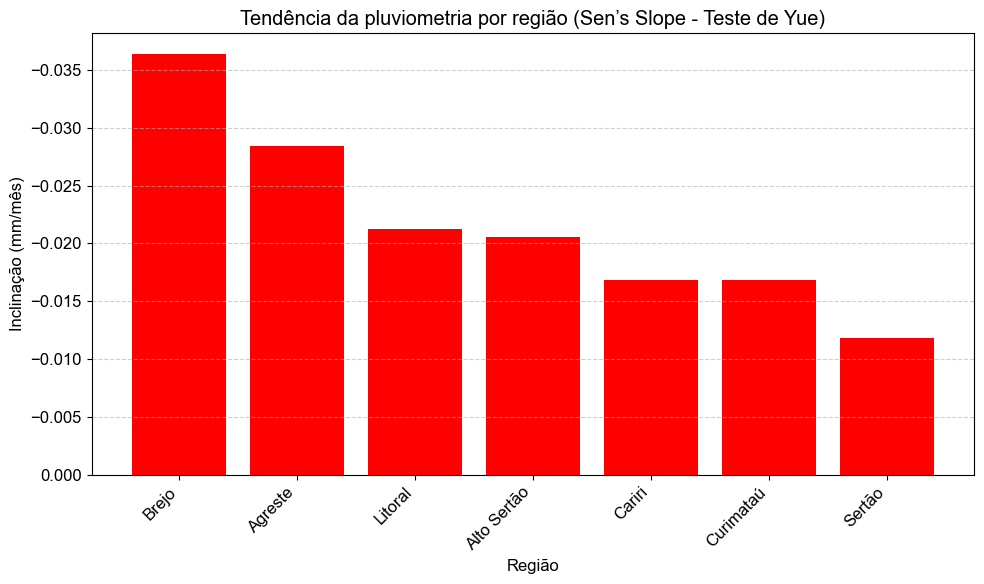

In [25]:
import matplotlib.pyplot as plt

# Ordenar por slope (para deixar mais claro visualmente)
df_plot = df_resultados_mk.sort_values('Slope (Yue)')

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

plt.figure(figsize=(10,6))
plt.bar(
    df_plot['Região'],
    df_plot['Slope (Yue)'],
    color=['red' if x < 0 else 'blue' for x in df_plot['Slope (Yue)']]
)
plt.gca().invert_yaxis()

plt.title("Tendência da pluviometria por região (Sen’s Slope - Teste de Yue)")
plt.ylabel("Inclinação (mm/mês)")
plt.xlabel("Região")
plt.xticks(rotation=45, ha='right')  # Gira os rótulos das regiões
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("plots/tendencia_região.png", dpi=300)
plt.show()


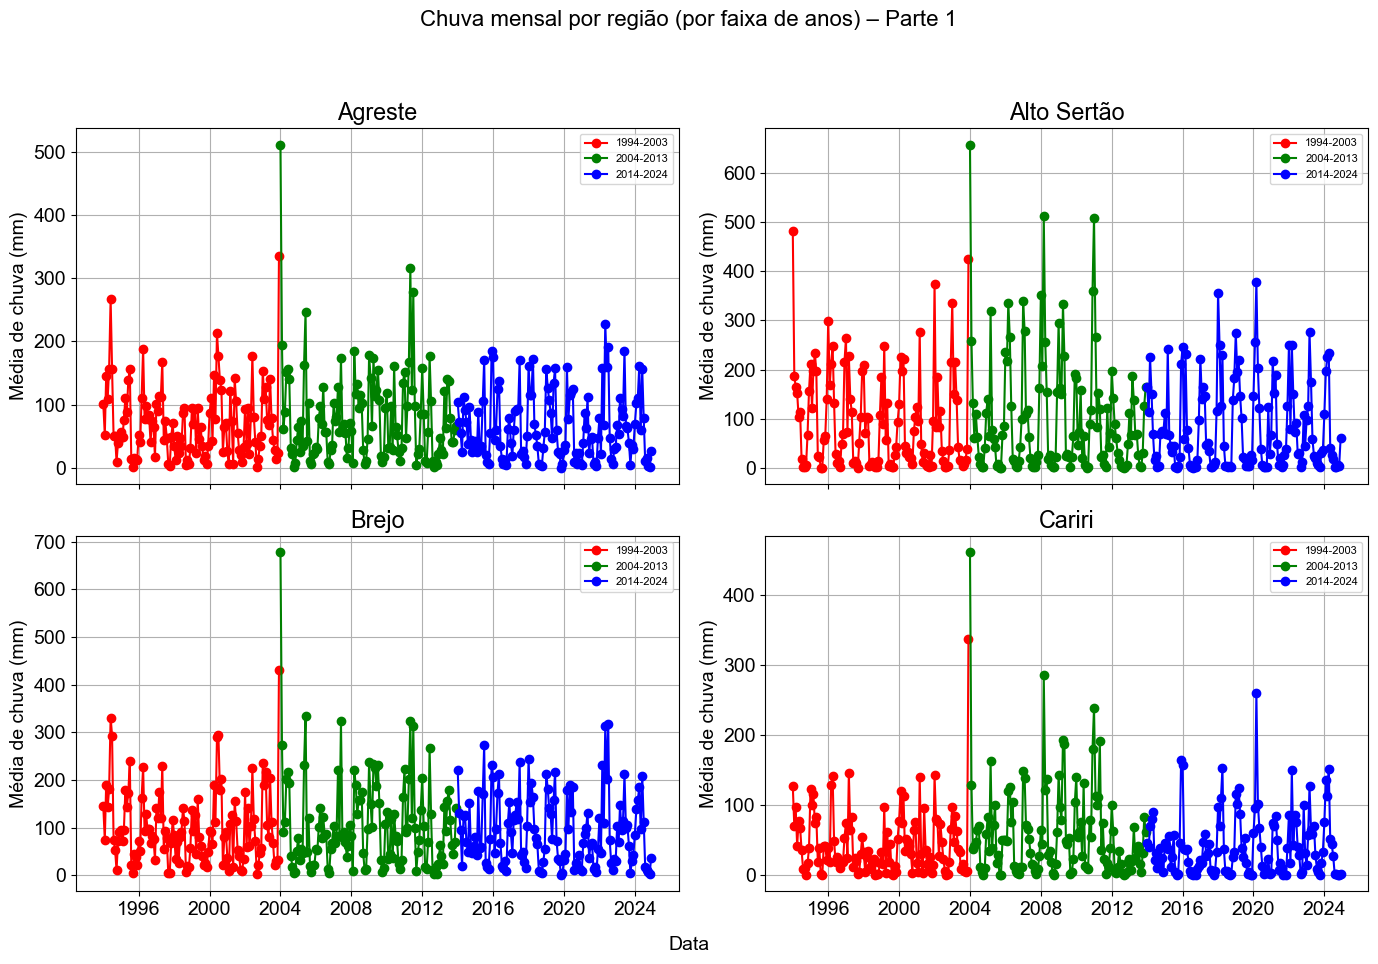

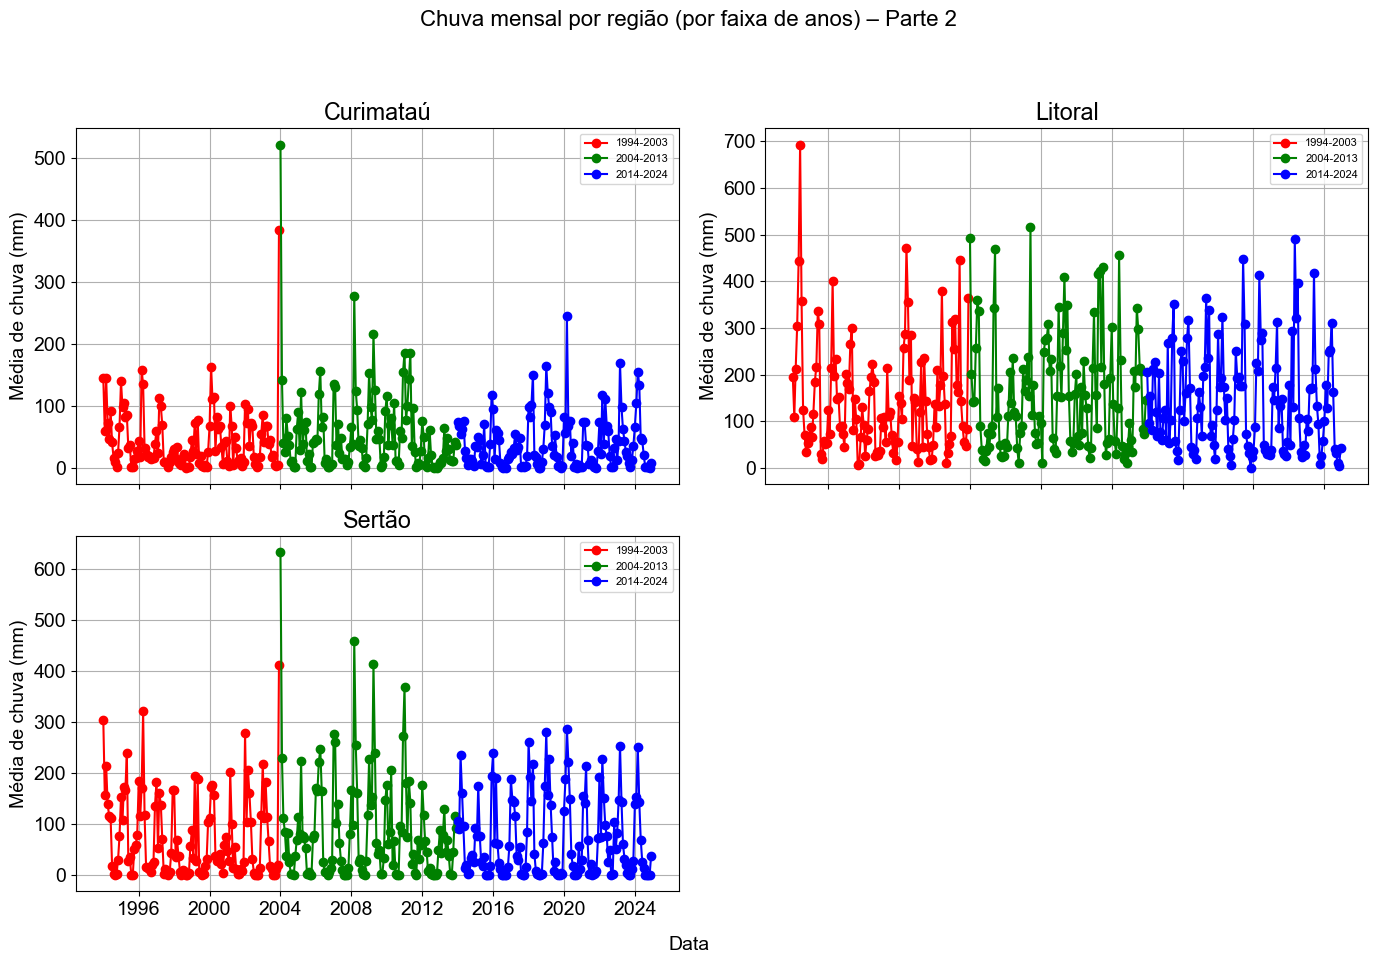

In [26]:
import matplotlib.pyplot as plt
import math

# Garantir ordenação por data
df_aesaregional = df_aesaregional.sort_values(by=['Região Pluviométrica', 'Data'])

# Listar regiões
regioes = df_aesaregional['Região Pluviométrica'].unique()

# Definir faixas de anos
faixas = {
    '1994-2003': (1994, 2003),
    '2004-2013': (2004, 2013),
    '2014-2024': (2014, 2024),
}

# Definir cores para cada faixa
cores = {
    '1994-2003': 'red',
    '2004-2013': 'green',
    '2014-2024': 'blue',
}

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

# ---------------------------
# FIGURA 1 (4 regiões)
# ---------------------------
fig1, axs1 = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axs1 = axs1.flatten()

for ax, regiao in zip(axs1, regioes[:4]):
    for faixa, (ano_ini, ano_fim) in faixas.items():
        subset = df_aesaregional[(df_aesaregional['Região Pluviométrica'] == regiao) &
                                 (df_aesaregional['Data'].dt.year >= ano_ini) &
                                 (df_aesaregional['Data'].dt.year <= ano_fim)]
        ax.plot(subset['Data'], subset['Pluviometria observada (mm)'], 
                marker='o', label=faixa, color=cores[faixa])

    ax.set_title(regiao)
    ax.set_ylabel("Média de chuva (mm)")
    ax.grid(True)
    ax.legend(fontsize=8)

fig1.text(0.5, 0.04, 'Data', ha='center')
fig1.suptitle("Chuva mensal por região (por faixa de anos) – Parte 1", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("plots/chuva_mensal_regiao_parte1.png", dpi=300)
plt.show()

# ---------------------------
# FIGURA 2 (3 regiões restantes)
# ---------------------------
fig2, axs2 = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axs2 = axs2.flatten()

for ax, regiao in zip(axs2, regioes[4:]):
    for faixa, (ano_ini, ano_fim) in faixas.items():
        subset = df_aesaregional[(df_aesaregional['Região Pluviométrica'] == regiao) &
                                 (df_aesaregional['Data'].dt.year >= ano_ini) &
                                 (df_aesaregional['Data'].dt.year <= ano_fim)]
        ax.plot(subset['Data'], subset['Pluviometria observada (mm)'], 
                marker='o', label=faixa, color=cores[faixa])

    ax.set_title(regiao)
    ax.set_ylabel("Média de chuva (mm)")
    ax.grid(True)
    ax.legend(fontsize=8)

# Remover o quarto subplot vazio
fig2.delaxes(axs2[-1])

fig2.text(0.5, 0.04, 'Data', ha='center')
fig2.suptitle("Chuva mensal por região (por faixa de anos) – Parte 2", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("plots/chuva_mensal_regiao_parte2.png", dpi=300)
plt.show()


In [27]:
import pandas as pd
import glob
import os

caminho_pasta = r'D:\Downloads\AESA'
arquivos_csv = glob.glob(os.path.join(caminho_pasta, "*.csv"))

# Extrair ano e mês do nome do arquivo
meses_arquivos = []
for f in arquivos_csv:
    nome = os.path.basename(f)
    partes = nome.split('-')[1].strip()  # pega '01_01_1994 a 31_01_1994'
    mes_ano = partes.split('a')[0].strip()  # pega '01_01_1994'
    mes, ano = map(int, mes_ano.split('_')[1:3])
    meses_arquivos.append((ano, mes))

# Criar lista de todos os meses esperados
todos_meses = [(ano, mes) for ano in range(1994, 2025) for mes in range(1, 13)]

# Verificar meses faltando
faltando = [m for m in todos_meses if m not in meses_arquivos]
print("Meses faltando:", faltando)


Meses faltando: []


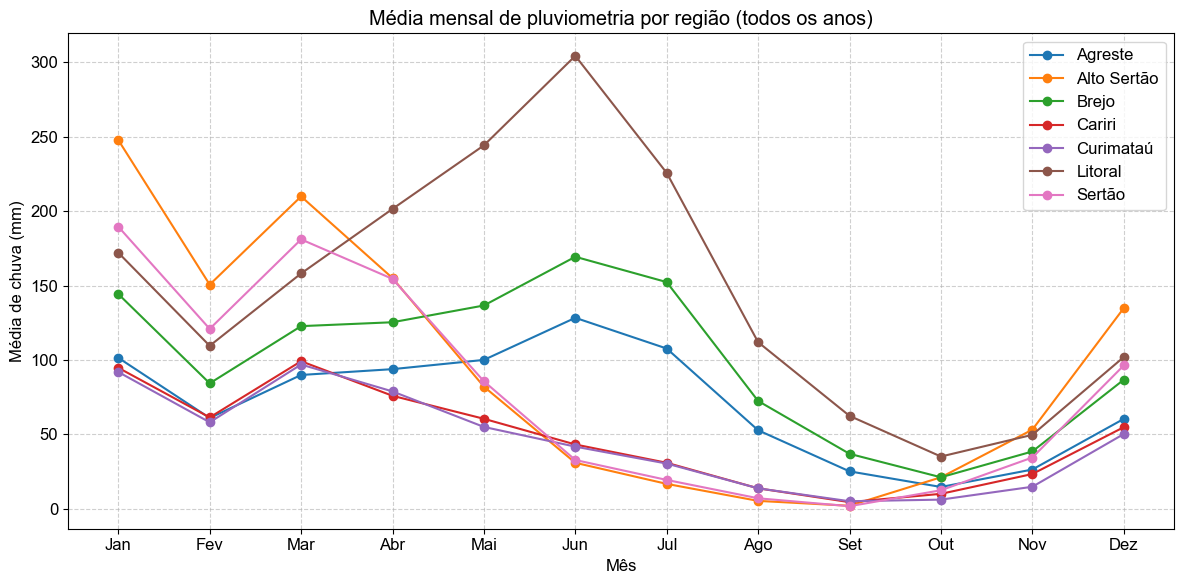

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Garantir ordenação por data
df_aesaregional['Data'] = pd.to_datetime(df_aesaregional['Data'])
df_aesaregional = df_aesaregional.sort_values(by=['Região Pluviométrica', 'Data'])

# Extrair o mês
df_aesaregional['Mês'] = df_aesaregional['Data'].dt.month

# Calcular média mensal por região (agregando todos os anos)
df_media_mensal = df_aesaregional.groupby(['Região Pluviométrica', 'Mês'])['Pluviometria observada (mm)'].mean().reset_index()


plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

# Plotar cada região em uma linha
plt.figure(figsize=(12,6))

for regiao in df_media_mensal['Região Pluviométrica'].unique():
    subset = df_media_mensal[df_media_mensal['Região Pluviométrica'] == regiao]
    plt.plot(subset['Mês'], subset['Pluviometria observada (mm)'], marker='o', label=regiao)

plt.xticks(range(1,13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.xlabel("Mês")
plt.ylabel("Média de chuva (mm)")
plt.title("Média mensal de pluviometria por região (todos os anos)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("plots/media_mensal_região.png", dpi=300)
plt.show()


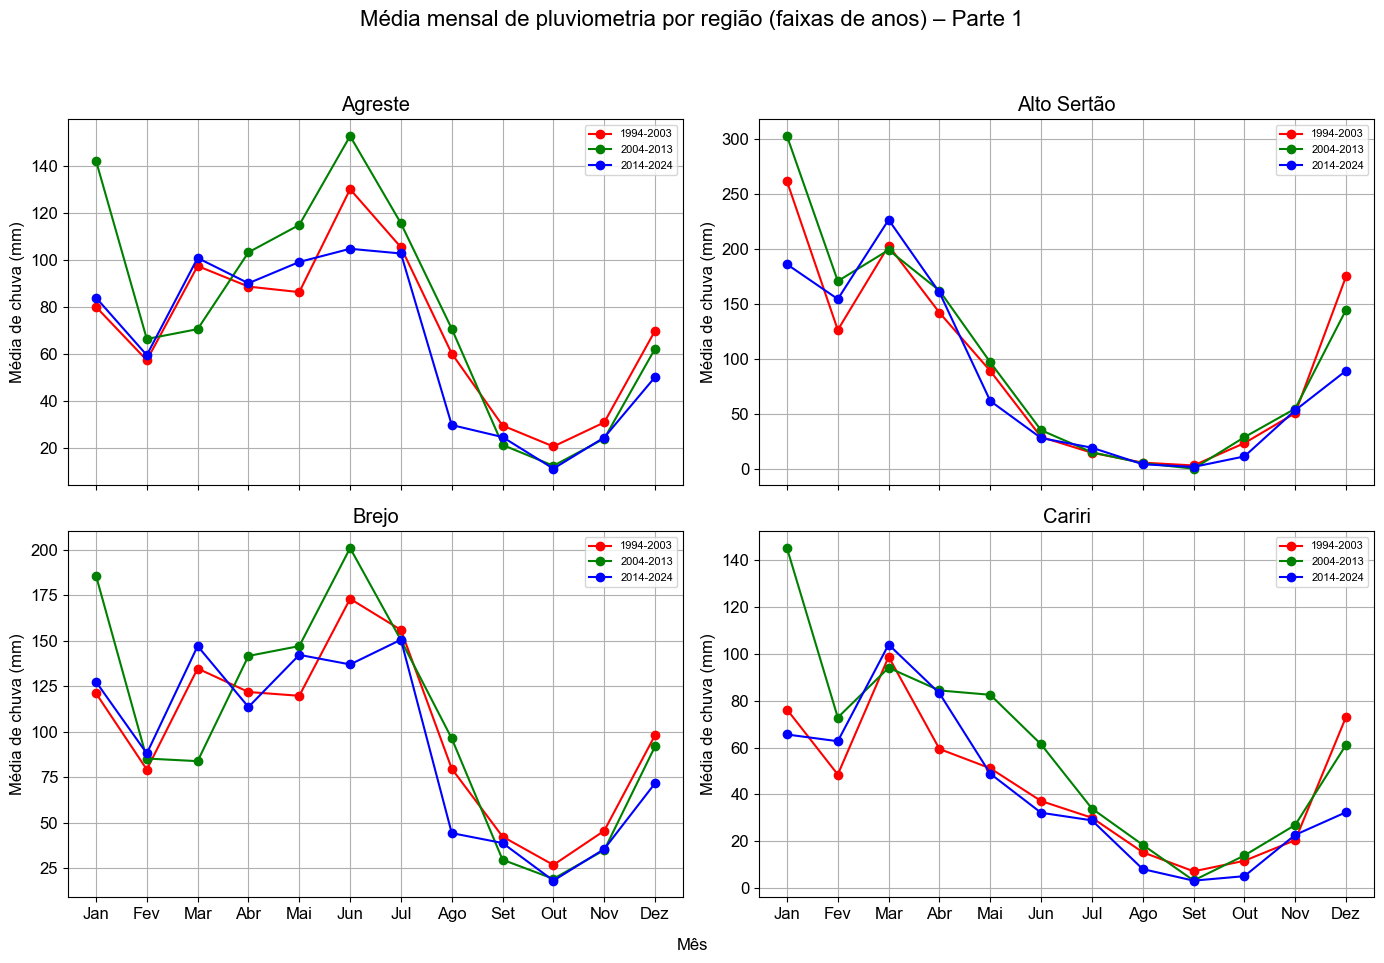

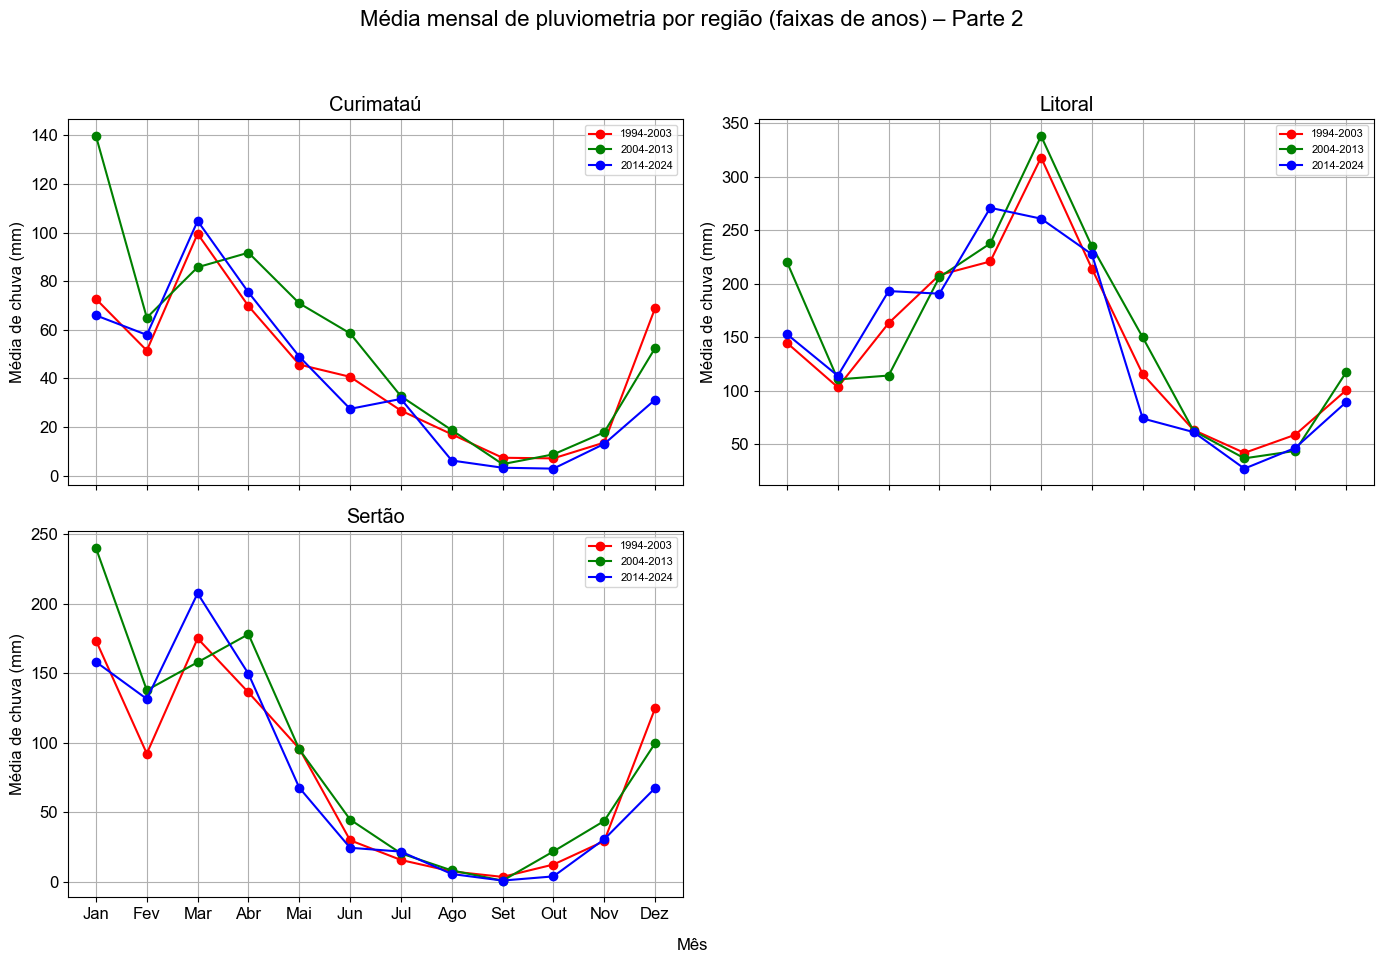

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Garantir ordenação e conversão de data
df_aesaregional['Data'] = pd.to_datetime(df_aesaregional['Data'])
df_aesaregional = df_aesaregional.sort_values(by=['Região Pluviométrica', 'Data'])

# Definir faixas de anos (10-10-11)
faixas = {
    '1994-2003': (1994, 2003),
    '2004-2013': (2004, 2013),
    '2014-2024': (2014, 2024),
}

# Definir cores para cada faixa
cores = {
    '1994-2003': 'red',
    '2004-2013': 'green',
    '2014-2024': 'blue',
}

# Listar regiões
regioes = df_aesaregional['Região Pluviométrica'].unique()

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12


# ============================================================
# FIGURA 1 — primeiras 4 regiões
# ============================================================

fig1, axs1 = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axs1 = axs1.flatten()

for ax, regiao in zip(axs1, regioes[:4]):
    for faixa, (ano_ini, ano_fim) in faixas.items():
        subset = df_aesaregional[
            (df_aesaregional['Região Pluviométrica'] == regiao) &
            (df_aesaregional['Data'].dt.year >= ano_ini) &
            (df_aesaregional['Data'].dt.year <= ano_fim)
        ].copy()

        subset['Mês'] = subset['Data'].dt.month

        media_mensal = subset.groupby('Mês')['Pluviometria observada (mm)'].mean().reset_index()

        ax.plot(media_mensal['Mês'], media_mensal['Pluviometria observada (mm)'],
                marker='o', label=faixa, color=cores[faixa])

    ax.set_title(regiao)
    ax.set_ylabel("Média de chuva (mm)")
    ax.grid(True)
    ax.legend(fontsize=8)
    ax.set_xticks(range(1, 12+1))
    ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])

fig1.text(0.5, 0.04, 'Mês', ha='center')
fig1.suptitle("Média mensal de pluviometria por região (faixas de anos) – Parte 1", fontsize=16, y=0.98)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("plots/media_mensal_faixa_regiao_parte1.png", dpi=300)
plt.show()


# ============================================================
# FIGURA 2 — últimas 3 regiões
# ============================================================

fig2, axs2 = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axs2 = axs2.flatten()

for ax, regiao in zip(axs2, regioes[4:]):
    for faixa, (ano_ini, ano_fim) in faixas.items():
        subset = df_aesaregional[
            (df_aesaregional['Região Pluviométrica'] == regiao) &
            (df_aesaregional['Data'].dt.year >= ano_ini) &
            (df_aesaregional['Data'].dt.year <= ano_fim)
        ].copy()

        subset['Mês'] = subset['Data'].dt.month

        media_mensal = subset.groupby('Mês')['Pluviometria observada (mm)'].mean().reset_index()

        ax.plot(media_mensal['Mês'], media_mensal['Pluviometria observada (mm)'],
                marker='o', label=faixa, color=cores[faixa])

    ax.set_title(regiao)
    ax.set_ylabel("Média de chuva (mm)")
    ax.grid(True)
    ax.legend(fontsize=8)
    ax.set_xticks(range(1, 12+1))
    ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])

# Remover o 4º subplot vazio
fig2.delaxes(axs2[-1])

fig2.text(0.5, 0.04, 'Mês', ha='center')
fig2.suptitle("Média mensal de pluviometria por região (faixas de anos) – Parte 2", fontsize=16, y=0.98)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("plots/media_mensal_faixa_regiao_parte2.png", dpi=300)
plt.show()


In [30]:
import pymannkendall as mk

resultados_slope = []

for regiao, grupo_regiao in df_aesaregional.groupby('Região Pluviométrica'):
    for faixa, (ano_ini, ano_fim) in faixas.items():
        subset = grupo_regiao[
            (grupo_regiao['Data'].dt.year >= ano_ini) &
            (grupo_regiao['Data'].dt.year <= ano_fim)
        ].copy()
        subset = subset.sort_values('Data')
        serie = subset['Pluviometria observada (mm)'].values

        if len(serie) > 1:
            mk_yue = mk.yue_wang_modification_test(serie)  # só precisamos do slope
            resultados_slope.append({
                'Região': regiao,
                'Faixa': faixa,
                'Slope (Yue)': mk_yue.slope
            })

df_slope_faixa = pd.DataFrame(resultados_slope)
print(df_slope_faixa)


         Região      Faixa  Slope (Yue)
0       Agreste  1994-2003    -0.100000
1       Agreste  2004-2013    -0.042948
2       Agreste  2014-2024    -0.048927
3   Alto Sertão  1994-2003    -0.228958
4   Alto Sertão  2004-2013    -0.065990
5   Alto Sertão  2014-2024    -0.026279
6         Brejo  1994-2003    -0.166667
7         Brejo  2004-2013    -0.011488
8         Brejo  2014-2024    -0.165041
9        Cariri  1994-2003    -0.085839
10       Cariri  2004-2013    -0.110791
11       Cariri  2014-2024    -0.006222
12    Curimataú  1994-2003    -0.100000
13    Curimataú  2004-2013    -0.113418
14    Curimataú  2014-2024    -0.001765
15      Litoral  1994-2003    -0.095147
16      Litoral  2004-2013     0.101210
17      Litoral  2014-2024    -0.256920
18       Sertão  1994-2003    -0.157124
19       Sertão  2004-2013    -0.088533
20       Sertão  2014-2024    -0.019917


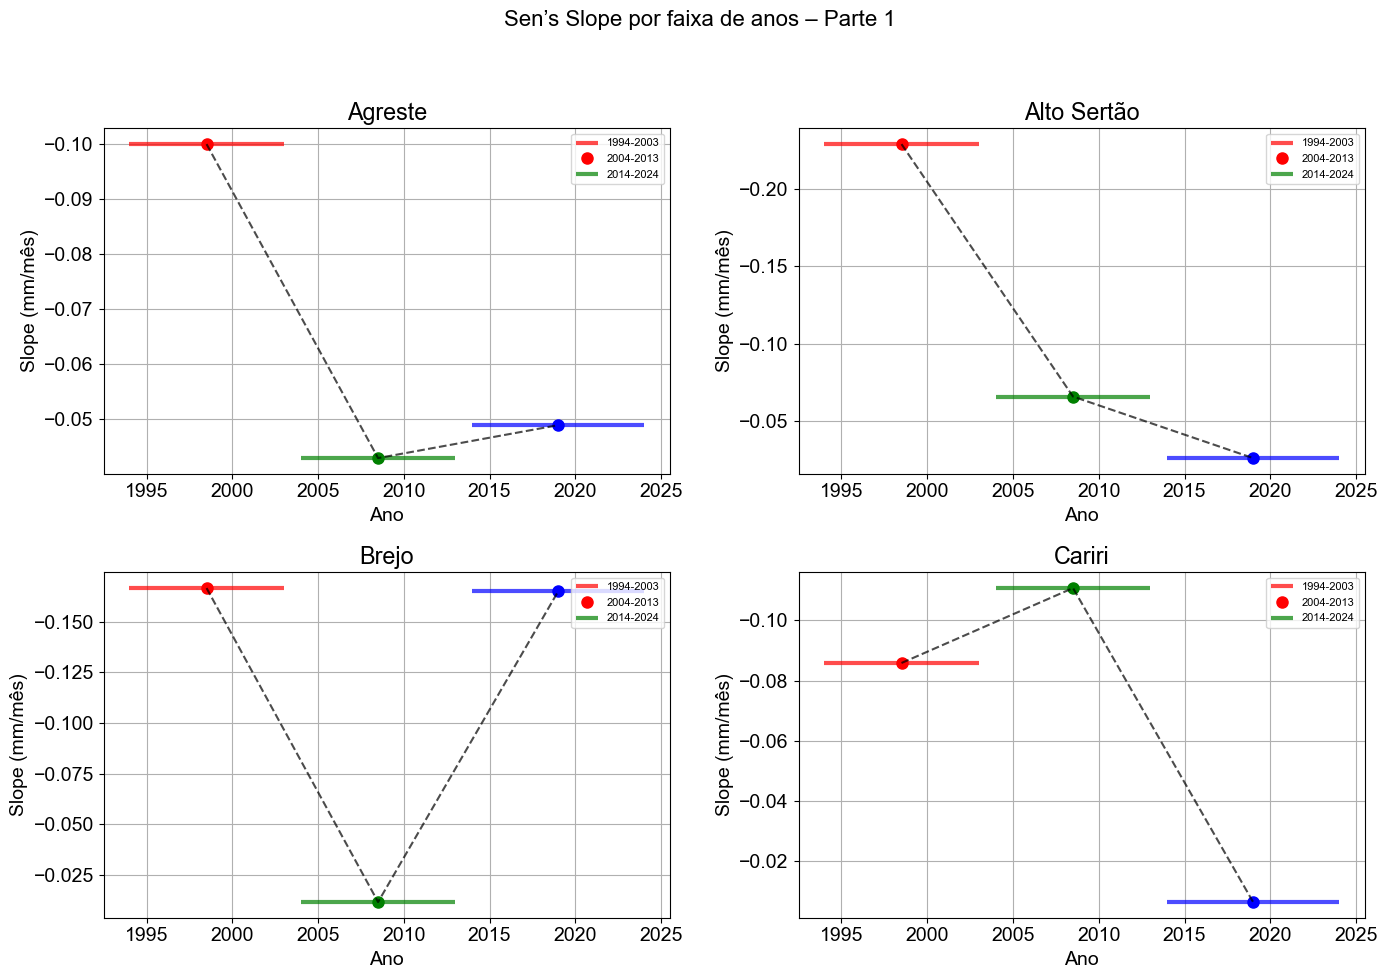

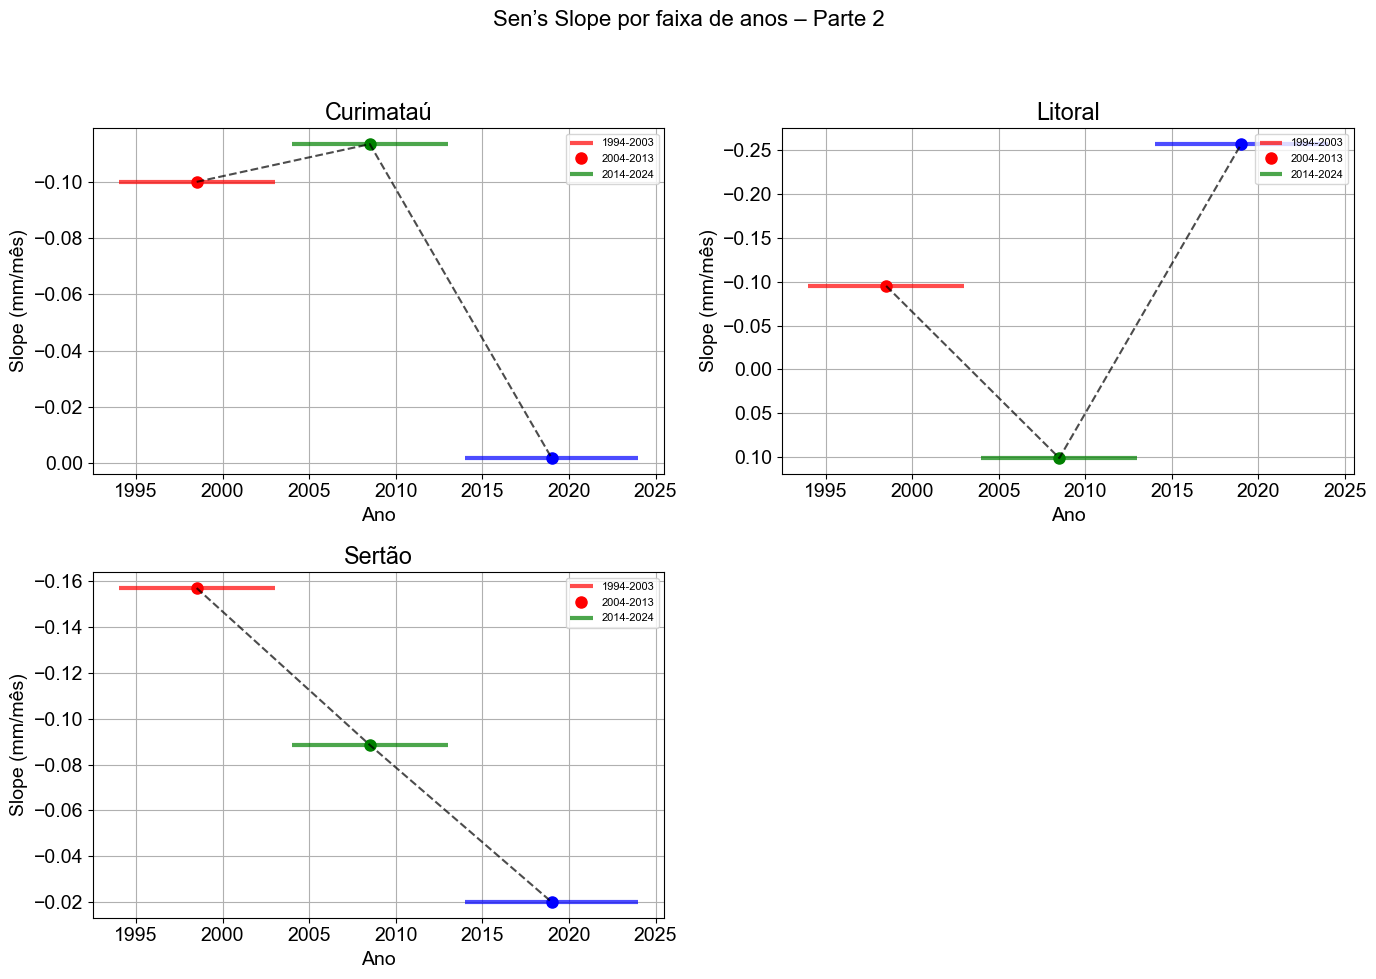

In [31]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pymannkendall as mk

# Cores para cada faixa
cores = {
    '1994-2003': 'red',
    '2004-2013': 'green',
    '2014-2024': 'blue',
}

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

regioes = df_aesaregional['Região Pluviométrica'].unique()


# ============================================================
# FIGURA 1 — primeiras 4 regiões
# ============================================================

fig1, axs1 = plt.subplots(2, 2, figsize=(14, 10))
axs1 = axs1.flatten()

for ax, regiao in zip(axs1, regioes[:4]):
    slopes = []
    anos_centro = []

    for faixa, (ano_ini, ano_fim) in faixas.items():
        subset = df_aesaregional[
            (df_aesaregional['Região Pluviométrica'] == regiao) &
            (df_aesaregional['Data'].dt.year >= ano_ini) &
            (df_aesaregional['Data'].dt.year <= ano_fim)
        ].copy()

        subset = subset.sort_values('Data')
        serie = subset['Pluviometria observada (mm)'].values

        if len(serie) > 1:
            mk_yue = mk.yue_wang_modification_test(serie)
            slopes.append(mk_yue.slope)
            anos_centro.append((ano_ini + ano_fim) / 2)

            ax.hlines(y=mk_yue.slope, xmin=ano_ini, xmax=ano_fim,
                      colors=cores[faixa], linewidth=3, alpha=0.7)

            ax.plot((ano_ini + ano_fim) / 2, mk_yue.slope,
                    'o', color=cores[faixa], markersize=8)

    if len(slopes) > 1:
        ax.plot(anos_centro, slopes, linestyle='--', color='black', alpha=0.7)

    ax.set_title(regiao)
    ax.set_ylabel("Slope (mm/mês)")
    ax.set_xlabel("Ano")
    ax.grid(True)
    ax.legend(list(faixas.keys()), fontsize=8)

# Inverter eixo Y em todos
for ax in axs1:
    ax.invert_yaxis()

fig1.suptitle("Sen’s Slope por faixa de anos – Parte 1", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("plots/Slope_faixa_anos_parte1.png", dpi=300)
plt.show()


# ============================================================
# FIGURA 2 — últimas 3 regiões
# ============================================================

fig2, axs2 = plt.subplots(2, 2, figsize=(14, 10))
axs2 = axs2.flatten()

for ax, regiao in zip(axs2, regioes[4:]):
    slopes = []
    anos_centro = []

    for faixa, (ano_ini, ano_fim) in faixas.items():
        subset = df_aesaregional[
            (df_aesaregional['Região Pluviométrica'] == regiao) &
            (df_aesaregional['Data'].dt.year >= ano_ini) &
            (df_aesaregional['Data'].dt.year <= ano_fim)
        ].copy()

        subset = subset.sort_values('Data')
        serie = subset['Pluviometria observada (mm)'].values

        if len(serie) > 1:
            mk_yue = mk.yue_wang_modification_test(serie)
            slopes.append(mk_yue.slope)
            anos_centro.append((ano_ini + ano_fim) / 2)

            ax.hlines(y=mk_yue.slope, xmin=ano_ini, xmax=ano_fim,
                      colors=cores[faixa], linewidth=3, alpha=0.7)

            ax.plot((ano_ini + ano_fim) / 2, mk_yue.slope,
                    'o', color=cores[faixa], markersize=8)

    if len(slopes) > 1:
        ax.plot(anos_centro, slopes, linestyle='--', color='black', alpha=0.7)

    ax.set_title(regiao)
    ax.set_ylabel("Slope (mm/mês)")
    ax.set_xlabel("Ano")
    ax.grid(True)
    ax.legend(list(faixas.keys()), fontsize=8)

# Remover o último subplot vazio
fig2.delaxes(axs2[-1])

# Inverter eixo Y
for ax in axs2[:-1]:
    ax.invert_yaxis()

fig2.suptitle("Sen’s Slope por faixa de anos – Parte 2", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("plots/Slope_faixa_anos_parte2.png", dpi=300)
plt.show()


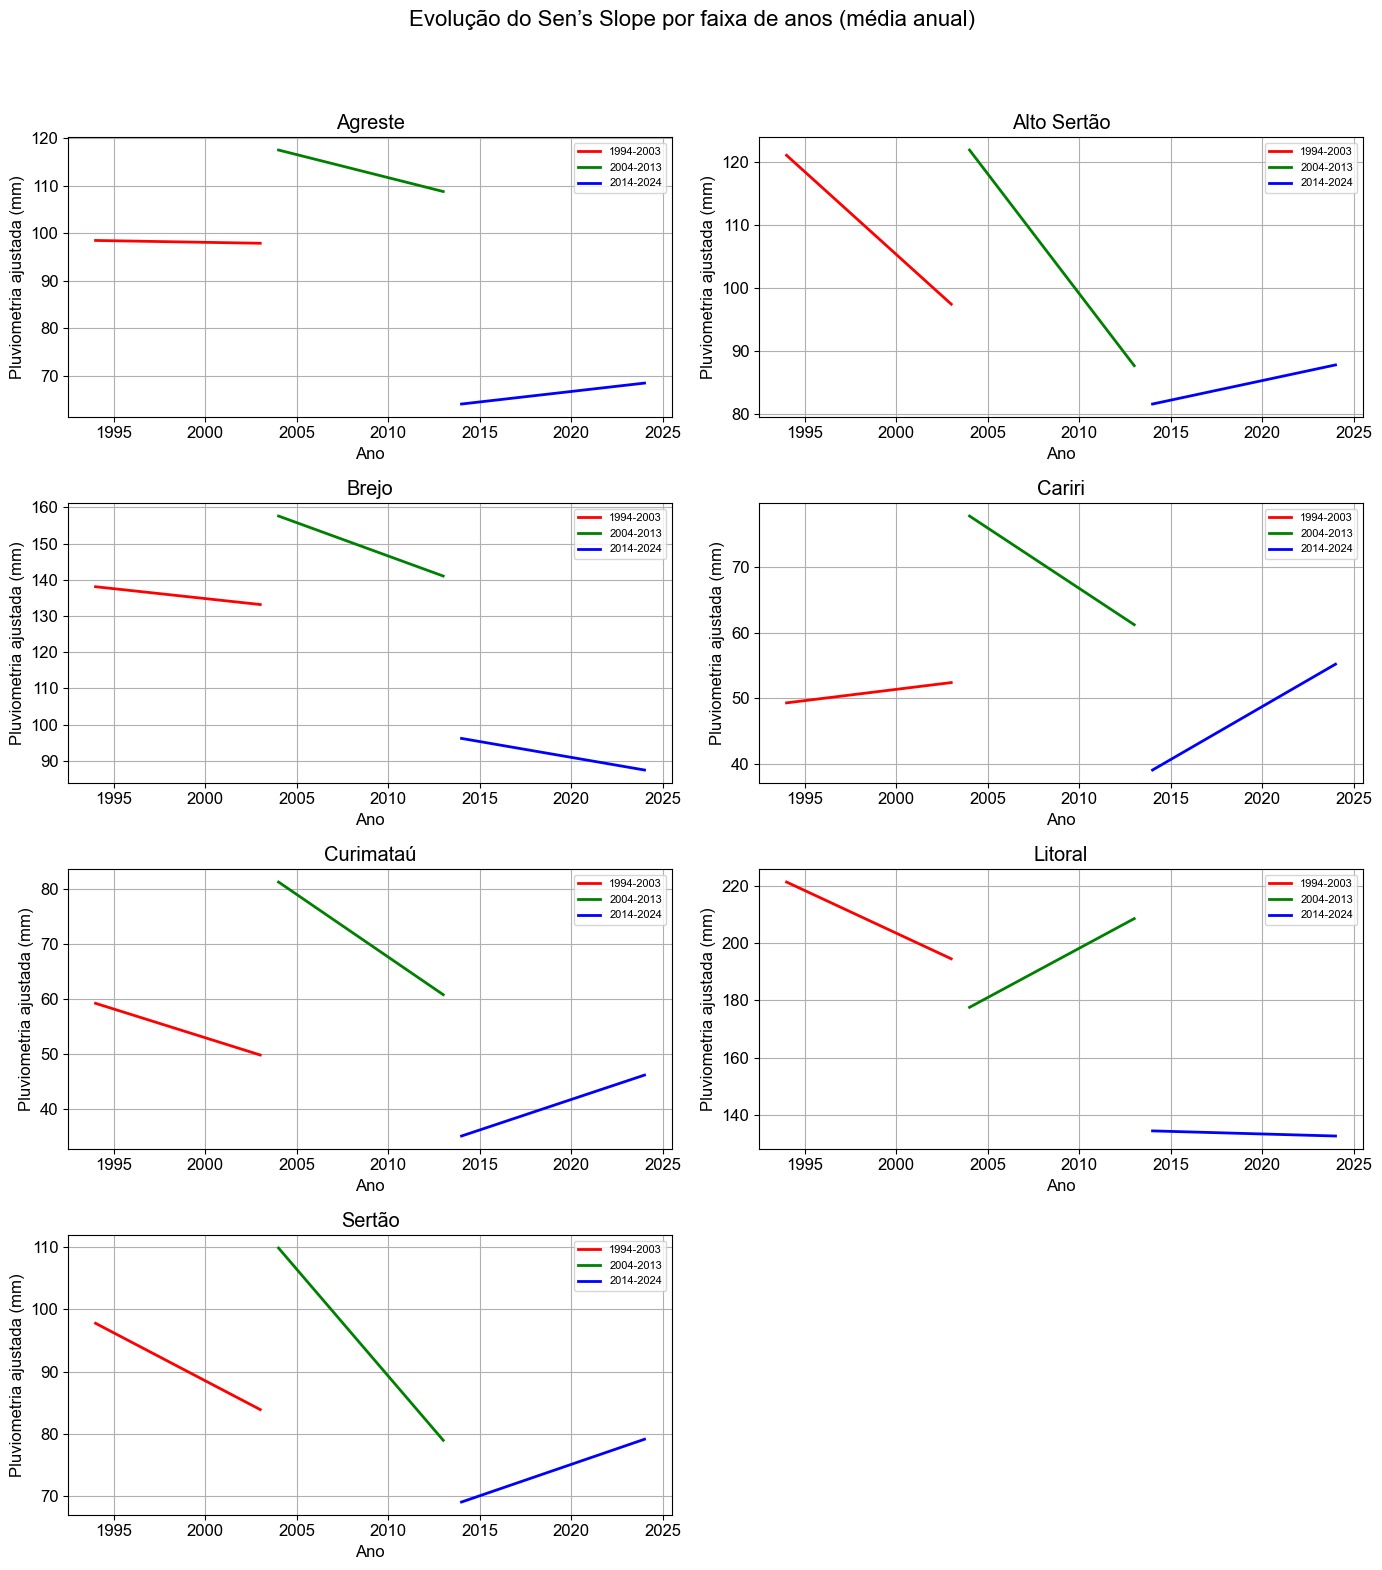

In [32]:
import matplotlib.pyplot as plt
import math
import pymannkendall as mk

cores = {
    '1994-2003': 'red',
    '2004-2013': 'green',
    '2014-2024': 'blue',
}
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

regioes = df_aesaregional['Região Pluviométrica'].unique()
ncols = 2
nrows = math.ceil(len(regioes)/ncols)
fig, axs = plt.subplots(nrows, ncols, figsize=(14, 4*nrows))
axs = axs.flatten()

for ax, regiao in zip(axs, regioes):
    for faixa, (ano_ini, ano_fim) in faixas.items():
        subset = df_aesaregional[
            (df_aesaregional['Região Pluviométrica'] == regiao) &
            (df_aesaregional['Data'].dt.year >= ano_ini) &
            (df_aesaregional['Data'].dt.year <= ano_fim)
        ].copy()
        subset = subset.sort_values('Data')

        # Agrupar por ano
        df_anual = subset.groupby(subset['Data'].dt.year)['Pluviometria observada (mm)'].mean().reset_index()
        df_anual.rename(columns={'Data':'Ano'}, inplace=True)
        anos = df_anual['Ano'].values
        valores = df_anual['Pluviometria observada (mm)'].values

        if len(valores) > 1:
            mk_yue = mk.yue_wang_modification_test(valores)
            slope_line = mk_yue.slope * (anos - anos[0]) + valores[0]
            ax.plot(anos, slope_line, color=cores[faixa], linewidth=2, label=faixa)

    ax.set_title(regiao)
    ax.set_ylabel("Pluviometria ajustada (mm)")
    ax.set_xlabel("Ano")
    ax.grid(True)
    ax.legend(fontsize=8)

# Remover subplots extras
for i in range(len(regioes), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("Evolução do Sen’s Slope por faixa de anos (média anual)", fontsize=16, y=0.98)
plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig("pluviometria_ajustada.png", dpi=300)
plt.show()


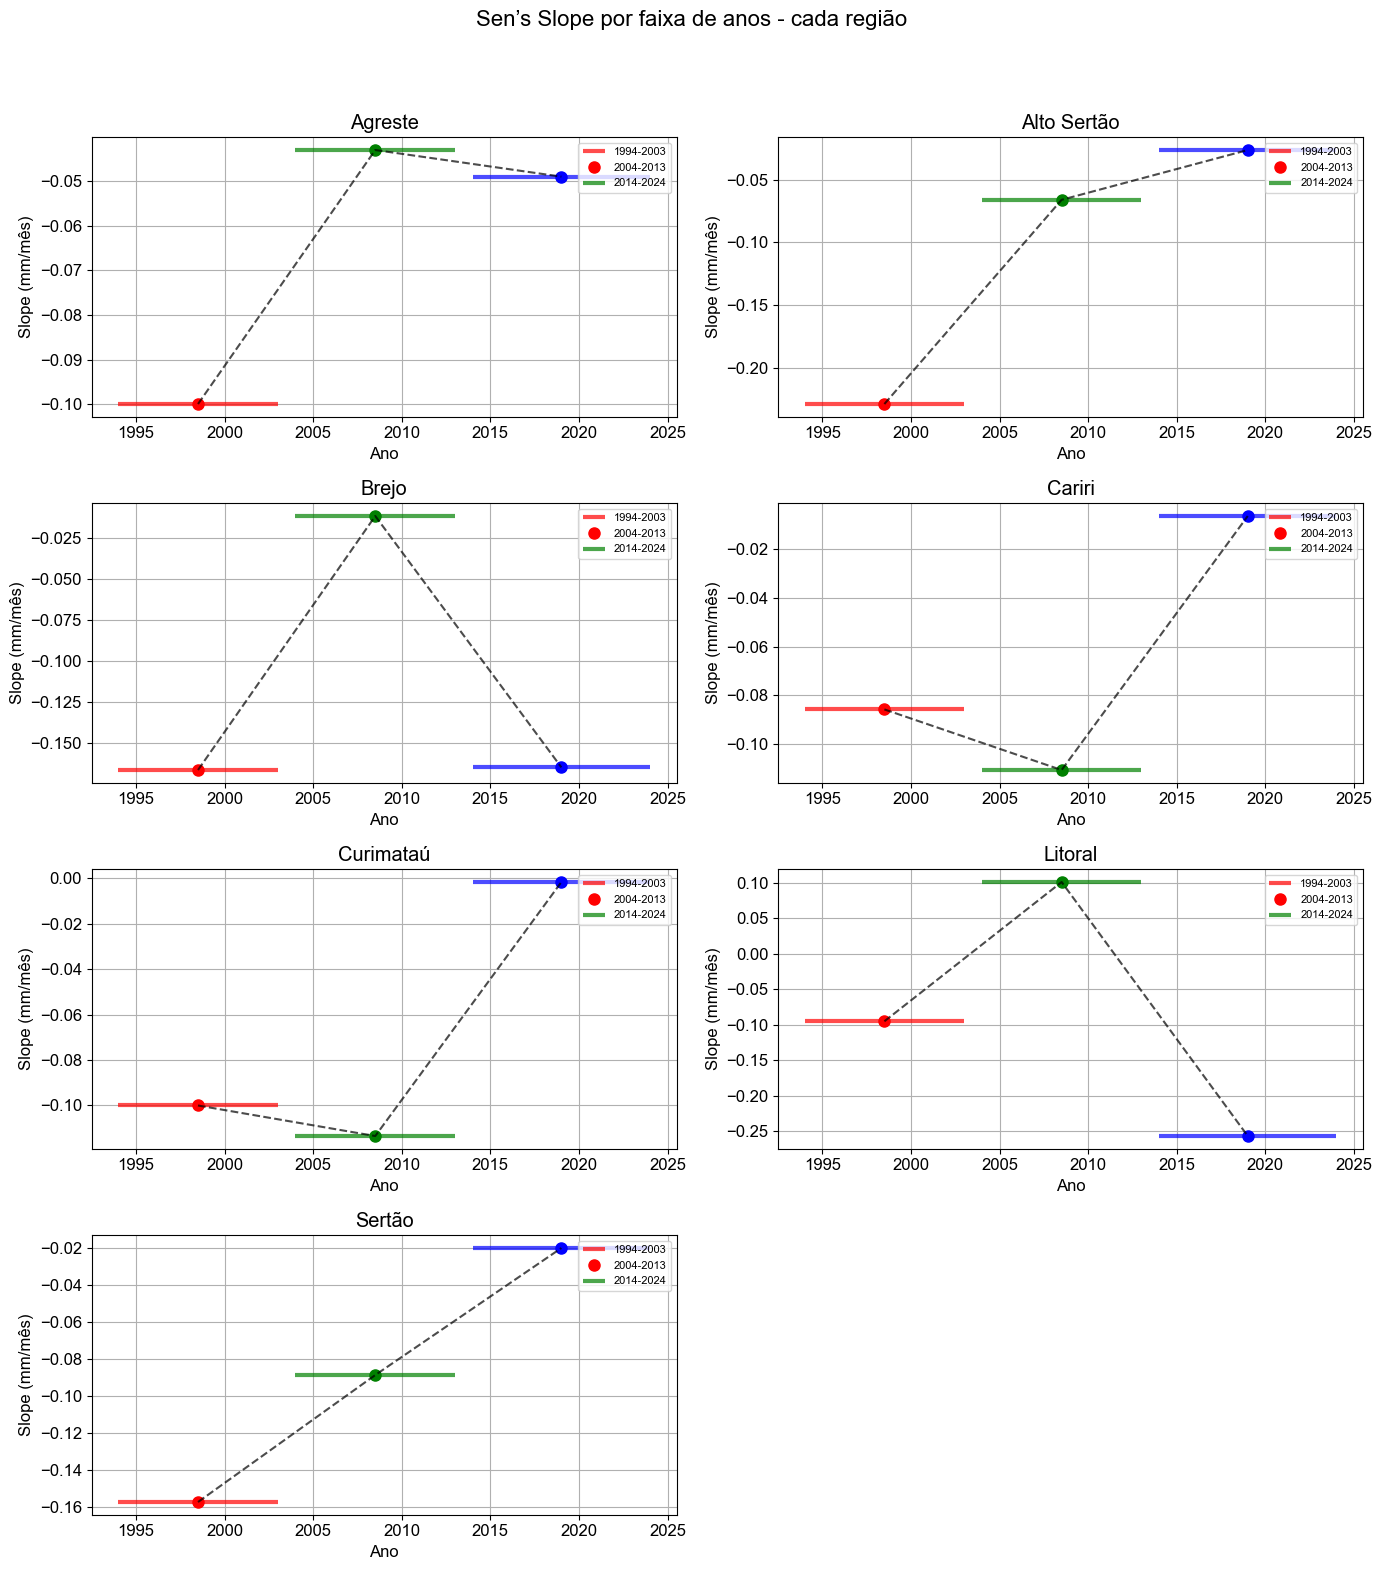

In [33]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pymannkendall as mk

# Cores para cada faixa
cores = {
    '1994-2003': 'red',
    '2004-2013': 'green',
    '2014-2024': 'blue',
}
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

regioes = df_aesaregional['Região Pluviométrica'].unique()
ncols = 2
nrows = math.ceil(len(regioes)/ncols)
fig, axs = plt.subplots(nrows, ncols, figsize=(14, 4*nrows))
axs = axs.flatten()

for ax, regiao in zip(axs, regioes):
    slopes = []
    anos_centro = []
    for faixa, (ano_ini, ano_fim) in faixas.items():
        subset = df_aesaregional[
            (df_aesaregional['Região Pluviométrica'] == regiao) &
            (df_aesaregional['Data'].dt.year >= ano_ini) &
            (df_aesaregional['Data'].dt.year <= ano_fim)
        ].copy()
        subset = subset.sort_values('Data')
        serie = subset['Pluviometria observada (mm)'].values

        if len(serie) > 1:
            mk_yue = mk.yue_wang_modification_test(serie)
            slopes.append(mk_yue.slope)
            anos_centro.append((ano_ini + ano_fim)/2)

            # Linha horizontal da faixa
            ax.hlines(y=mk_yue.slope, xmin=ano_ini, xmax=ano_fim,
                      colors=cores[faixa], linewidth=3, alpha=0.7)
            # Ponto no centro
            ax.plot((ano_ini + ano_fim)/2, mk_yue.slope, 'o', color=cores[faixa], markersize=8)

    # Linha conectando os pontos das faixas
    if len(slopes) > 1:
        ax.plot(anos_centro, slopes, linestyle='--', color='black', alpha=0.7)

    ax.set_title(regiao)
    ax.set_ylabel("Slope (mm/mês)")
    ax.set_xlabel("Ano")
    ax.grid(True)
    ax.legend([f'{faixa}' for faixa in faixas.keys()], fontsize=8)

# Remover subplots extras
for i in range(len(regioes), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("Sen’s Slope por faixa de anos - cada região", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


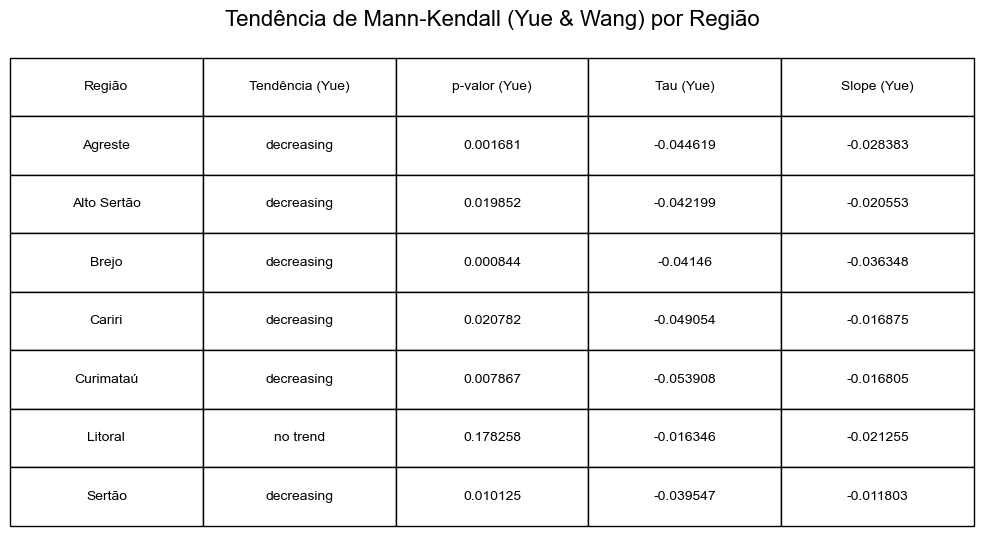

In [34]:
import matplotlib.pyplot as plt

# Filtrar apenas colunas referentes ao teste de Yue & Wang
df_yue = df_resultados_mk[['Região', 'Tendência (Yue)', 'p-valor (Yue)', 'Tau (Yue)', 'Slope (Yue)']].copy()

# Arredondar valores numéricos para 6 casas decimais
df_yue['p-valor (Yue)'] = df_yue['p-valor (Yue)'].round(6)
df_yue['Tau (Yue)'] = df_yue['Tau (Yue)'].round(6)
df_yue['Slope (Yue)'] = df_yue['Slope (Yue)'].round(6)

# Criar figura da tabela
fig, ax = plt.subplots(figsize=(len(df_yue.columns)*2, len(df_yue)*0.5 + 2))
ax.axis('off')
ax.axis('tight')

# Criar tabela
tabela = ax.table(
    cellText=df_yue.values,
    colLabels=df_yue.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]  # ocupa toda a área
)

tabela.auto_set_font_size(False)
tabela.set_fontsize(10)

# Título e layout
plt.title("Tendência de Mann-Kendall (Yue & Wang) por Região", fontsize=16, y=1.05)
plt.tight_layout()

# Salvar e exibir
plt.savefig("plots/tabela_mann_kendall_yue.png", dpi=300)
plt.show()

df_yue.to_html("Tendencia-Regioes.html", index=False)
